# Study Coin Cell Data Sensitivities

9/20/2020

In [10]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks-2022-frontiers':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import re 
from pathlib import Path
from scipy.signal import savgol_filter
from scipy import fftpack

from matplotlib import pyplot as plt
import src.plotter as plotter

import warnings
warnings.filterwarnings('ignore')

In [11]:
plotter.initialize(plt)
output_path = 'outputs'

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [12]:
def file_list_to_df_list(file_list):

    df_list = []

    for file in file_list:
        
        # First read in the file to get the number of header lines
        df = pd.read_table(file, encoding='iso8859', on_bad_lines='skip')
        num_header_lines = int("".join(re.findall(r'\d', df.iloc[0][0]))) - 1
        
        # Read in the same file again, this time excluding the headers
        df = pd.read_table(file, encoding='iso8859', skiprows=num_header_lines)

        df_list.append(df)
        
        print(f'The file "{file.name}" contains {len(df.columns)} columns.')
        
        if 'Analog IN 1/V' in df.columns:
            print('Analog IN 1 is present in this file.')

    return df_list

In [13]:
def make_plot(file : Path, df: pd.DataFrame):

    plt.figure(figsize=(10, 5))
    plt.title(file.name)
    plt.plot(df['time/s']/3600, df['Ecell/V'], label='Main')
    if 'Analog IN 1/V' in df.columns:
        plt.plot(df['time/s']/3600, df['Analog IN 1/V'], label='Analog IN 1')
    plt.legend()
    plt.xlabel('Time (hrs)')
    plt.ylabel('Voltage (V)')

# File inspection

Inspect all of the files to identify the relevant ones. Flag the relevant ones manually.

The file "20210913_coin_graphite_cell7_c50_CA7.mpt" contains 29 columns.
The file "20210924_coin_graphite_cell7_c50_2_CA7.mpt" contains 33 columns.
The file "20211008_coin_graphite_cell8_c50_1_CA8.mpt" contains 33 columns.
The file "20211021_coin_graphite_cell8_c50_2_CA8.mpt" contains 32 columns.
The file "20211008_coin_graphite_cell7_c150_1_CA7.mpt" contains 33 columns.
The file "20211122_coin_graphite_cell8_c150_1_CA8.mpt" contains 33 columns.
The file "20210903_coin_lfp_cell6_c50_1_CA4.mpt" contains 29 columns.
The file "20210903_coin_lfp_cell6_c50_2_CA4.mpt" contains 33 columns.
The file "20210924_coin_lfp_cell6_c50_2_CA4.mpt" contains 33 columns.
The file "20210827_coin_nmc111_cell2_c50_1_CA2.mpt" contains 29 columns.
The file "20211203_coin_nmc111_cell1_c50_CA2.mpt" contains 33 columns.
The file "20220315_coin_graphite_1520_c150_CA2.mpt" contains 31 columns.
The file "20220324_coin_graphite_1520_c150_CA2.mpt" contains 31 columns.
The file "20220418_coin_graphite_1520_c50_CA2.mpt"

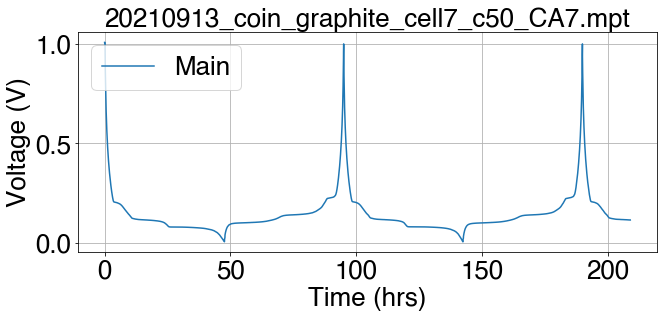

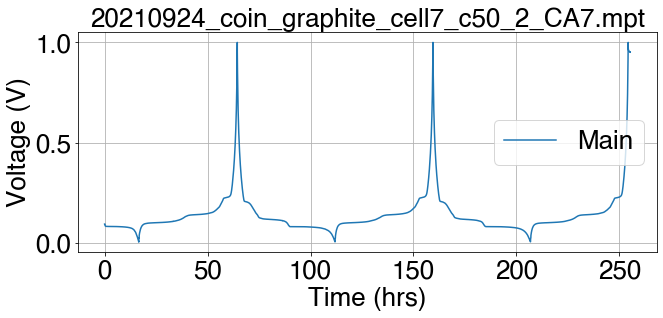

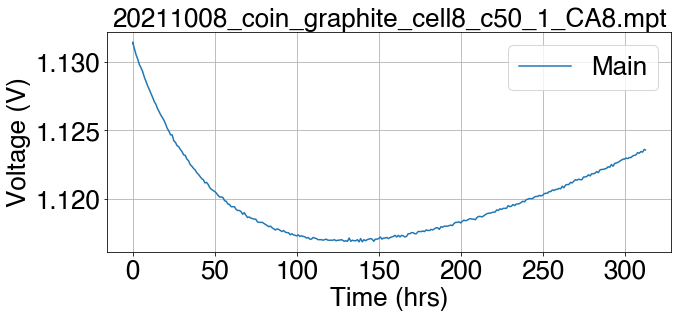

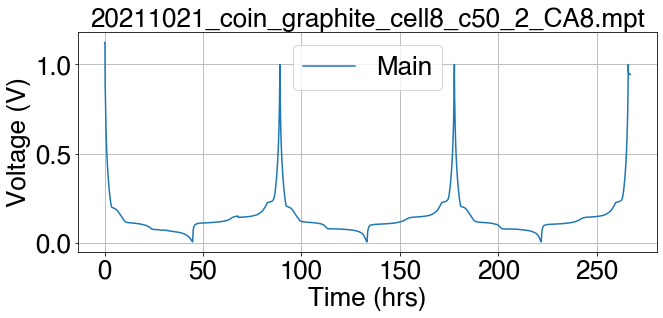

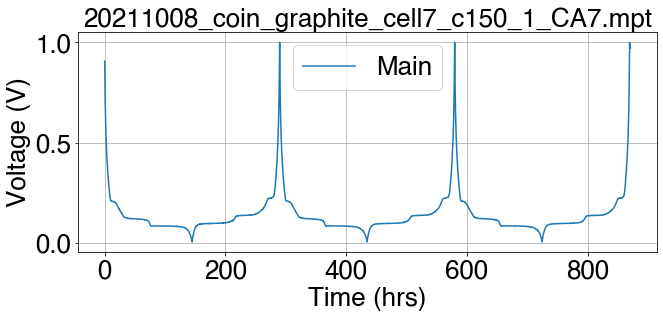

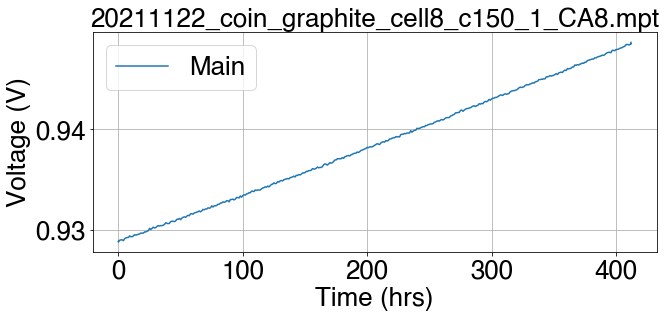

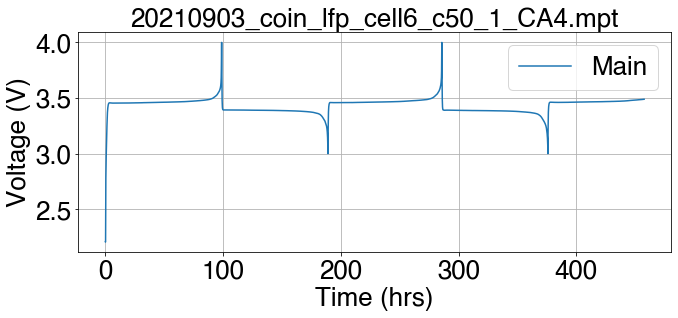

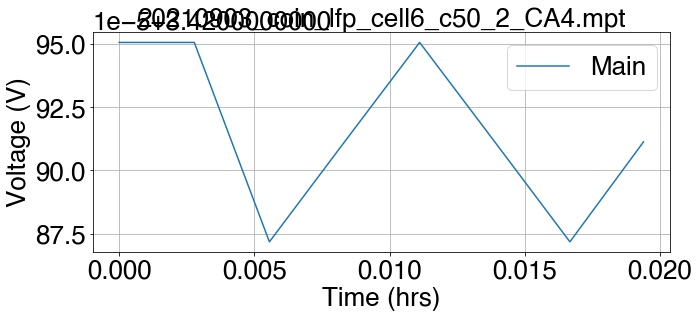

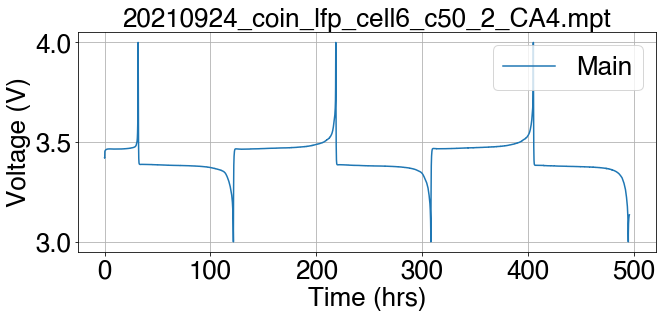

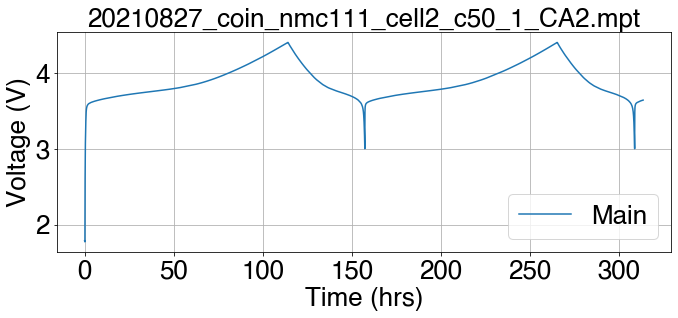

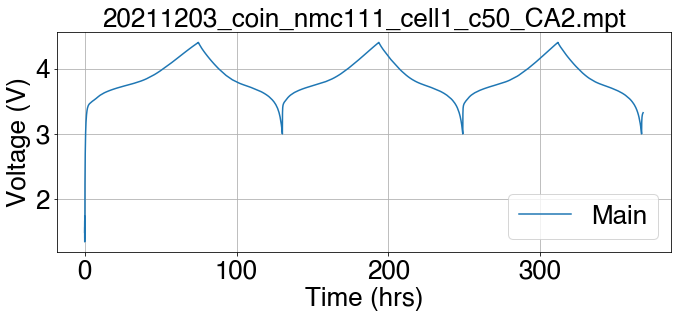

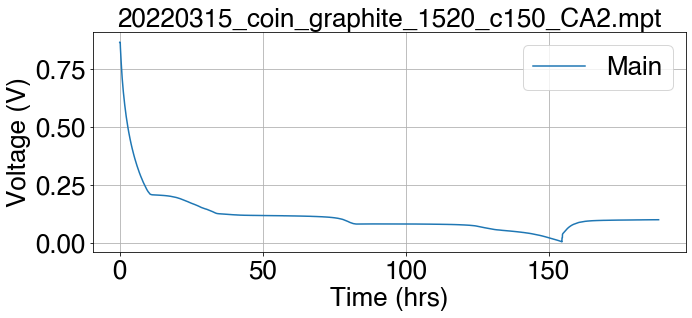

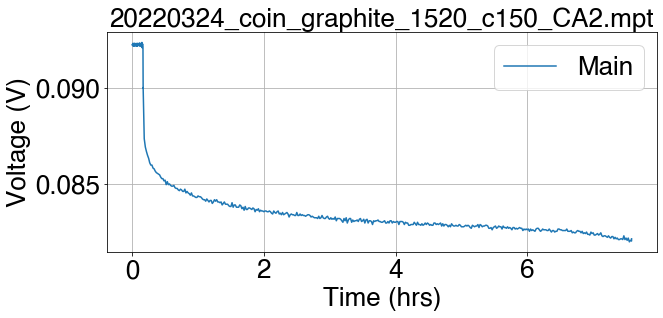

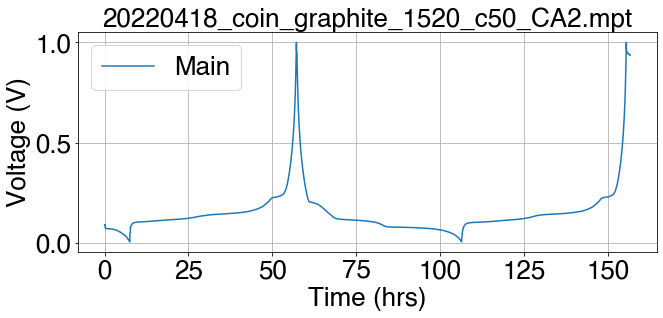

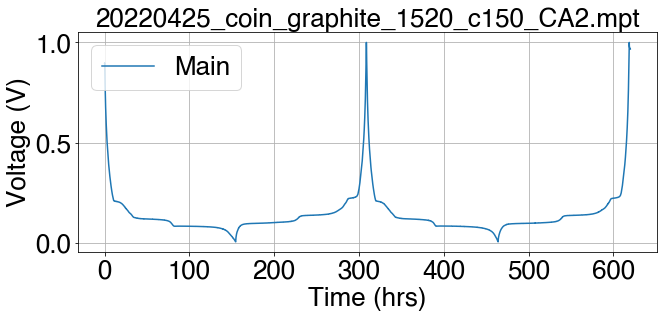

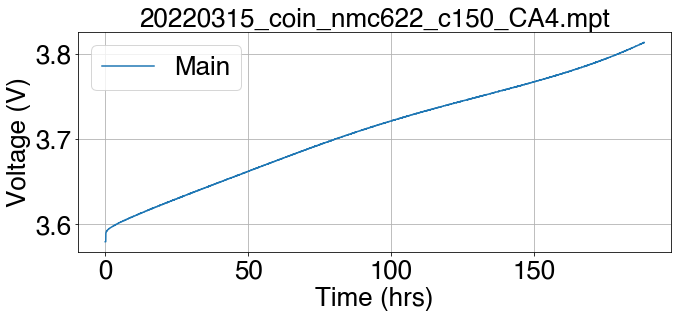

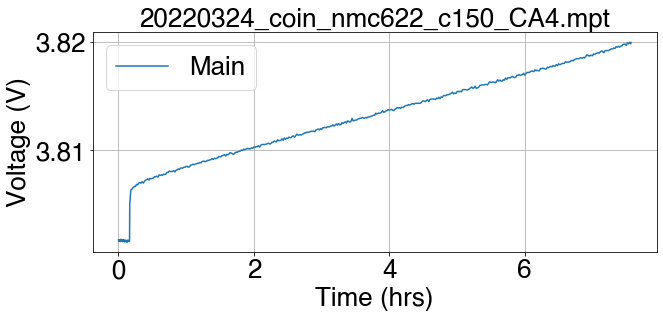

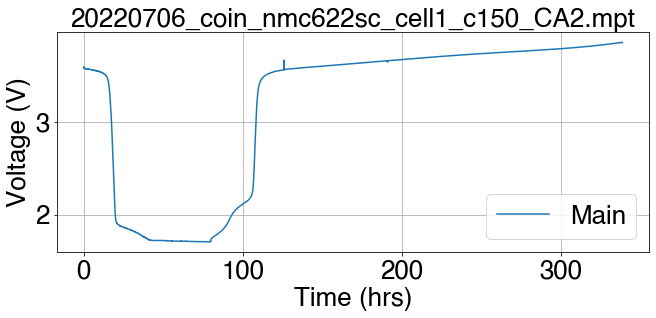

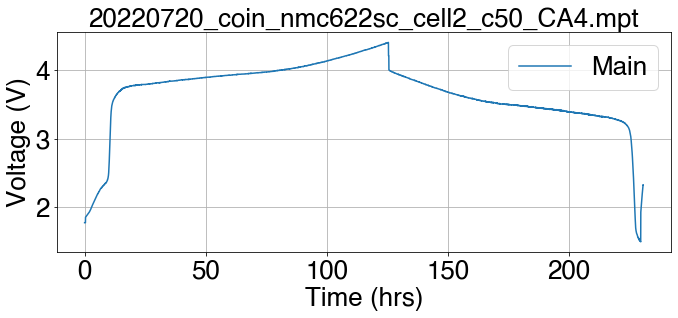

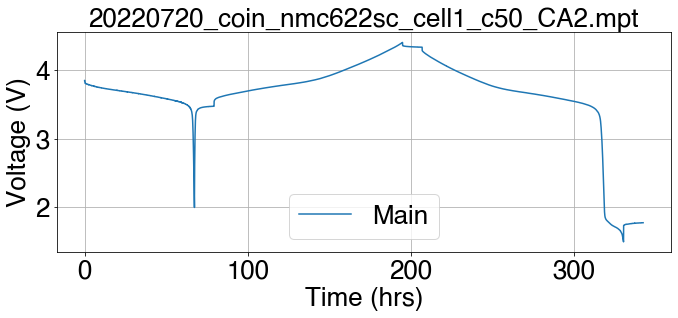

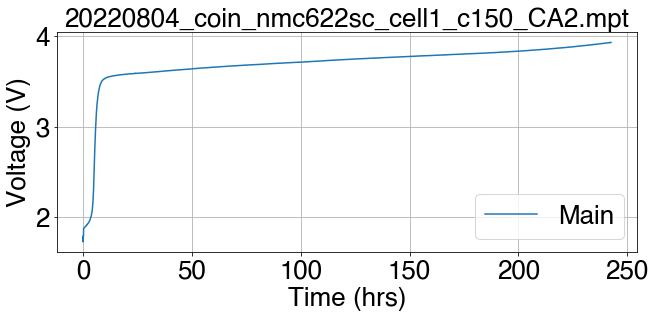

In [14]:
folder_list = ['UMBL2020/graphite',
               'UMBL2020/lfp',
               'UMBL2020/nmc111',
               'UMBL2022FEB/graphite-1520',
               'UMBL2022FEB/nmc622-singlecrystal']

for folder in folder_list:

    data_path = f'data/2022-10-09-biologic-pc/{folder}'
    file_list = sorted(Path(data_path).glob("*.mpt"), key=os.path.getmtime)

    df_list = file_list_to_df_list(file_list)

    for file, df in zip(file_list, df_list):
        make_plot(file, df)

# Process the selected C/50 or C/150 electrode schedule files

In [15]:
neg_tags = ['Gr2020, Cell7, C/50',
            'Gr2020, Cell7, C/50',
            'Gr2020, Cell7, C/150',
            'Gr2020, Cell8, C/50',
            'Gr2022-1520, Cell1, C/150',
            'Gr2022-1520, Cell1, C/50',
            'Gr2022-1520, Cell1, C/150',
            'NMC111, Cell1, C/50']

neg_sdu_list = ['Gr-C50', 'Gr-C50', 'Gr-C150', 'Gr-C50', 'Gr-C150', 'Gr-C50', 'Gr-C150', 'NMC111-C50']

file_paths_neg = ['UMBl2020/graphite/20210913_coin_graphite_cell7_c50_CA7.mpt',
                  'UMBL2020/graphite/20210924_coin_graphite_cell7_c50_2_CA7.mpt',
                  'UMBL2020/graphite/20211008_coin_graphite_cell7_c150_1_CA7.mpt',
                  'UMBL2020/graphite/20211021_coin_graphite_cell8_c50_2_CA8.mpt',
                  'UMBL2022FEB/graphite-1520/20220315_coin_graphite_1520_c150_CA2.mpt',
                  'UMBL2022FEB/graphite-1520/20220418_coin_graphite_1520_c50_CA2.mpt',
                  'UMBL2022FEB/graphite-1520/20220425_coin_graphite_1520_c150_CA2.mpt',
                  'UMBL2020/nmc111/20211203_coin_nmc111_cell1_c50_CA2.mpt']

file_paths = []

idx_picked = [0, 7]
file_path_picked = []
df_picked = []
label_picked = []

for file_name in file_paths_neg:
    file_paths.append(Path(f'data/2022-10-09-biologic-pc/{file_name}'))  

df_list = file_list_to_df_list(file_paths)

idx = 0
for file_path, df, label in zip(file_paths, df_list, neg_sdu_list):
    if idx in idx_picked:
        file_path_picked.append(file_path)
        df_picked.append(df)
        label_picked.append(label)
    idx += 1



The file "20210913_coin_graphite_cell7_c50_CA7.mpt" contains 29 columns.
The file "20210924_coin_graphite_cell7_c50_2_CA7.mpt" contains 33 columns.
The file "20211008_coin_graphite_cell7_c150_1_CA7.mpt" contains 33 columns.
The file "20211021_coin_graphite_cell8_c50_2_CA8.mpt" contains 32 columns.
The file "20220315_coin_graphite_1520_c150_CA2.mpt" contains 31 columns.
The file "20220418_coin_graphite_1520_c50_CA2.mpt" contains 31 columns.
The file "20220425_coin_graphite_1520_c150_CA2.mpt" contains 31 columns.
The file "20211203_coin_nmc111_cell1_c50_CA2.mpt" contains 33 columns.


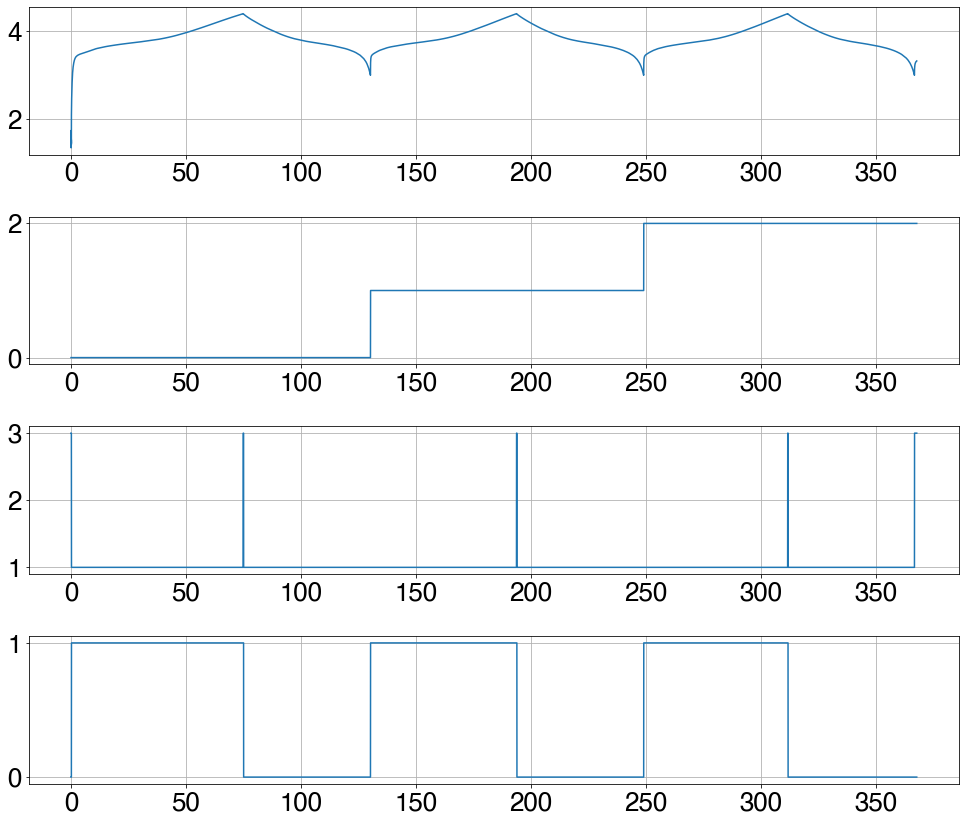

In [16]:
plt.figure()

plt.subplot(4,1,1)
plt.plot(df['time/s']/3600, df['Ecell/V'])
plt.subplot(4, 1, 2)
plt.plot(df['time/s']/3600, df['cycle number'])
plt.subplot(4, 1, 3)
plt.plot(df['time/s']/3600, df['mode'])
plt.subplot(4, 1, 4)
plt.plot(df['time/s']/3600, df['ox/red'])

Working on data/2022-10-09-biologic-pc/UMBl2020/graphite/20210913_coin_graphite_cell7_c50_CA7.mpt
Working on data/2022-10-09-biologic-pc/UMBL2020/graphite/20210924_coin_graphite_cell7_c50_2_CA7.mpt
Working on data/2022-10-09-biologic-pc/UMBL2020/graphite/20211008_coin_graphite_cell7_c150_1_CA7.mpt
Working on data/2022-10-09-biologic-pc/UMBL2020/graphite/20211021_coin_graphite_cell8_c50_2_CA8.mpt
Working on data/2022-10-09-biologic-pc/UMBL2022FEB/graphite-1520/20220315_coin_graphite_1520_c150_CA2.mpt
Working on data/2022-10-09-biologic-pc/UMBL2022FEB/graphite-1520/20220418_coin_graphite_1520_c50_CA2.mpt
Working on data/2022-10-09-biologic-pc/UMBL2022FEB/graphite-1520/20220425_coin_graphite_1520_c150_CA2.mpt
Working on data/2022-10-09-biologic-pc/UMBL2020/nmc111/20211203_coin_nmc111_cell1_c50_CA2.mpt


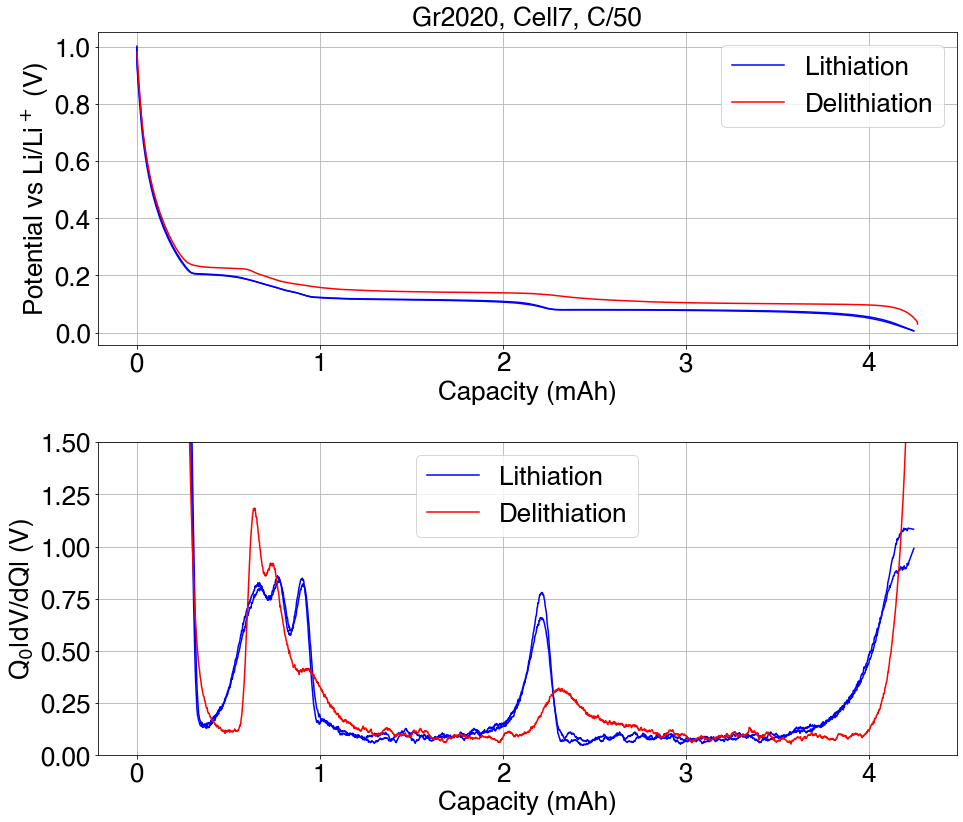

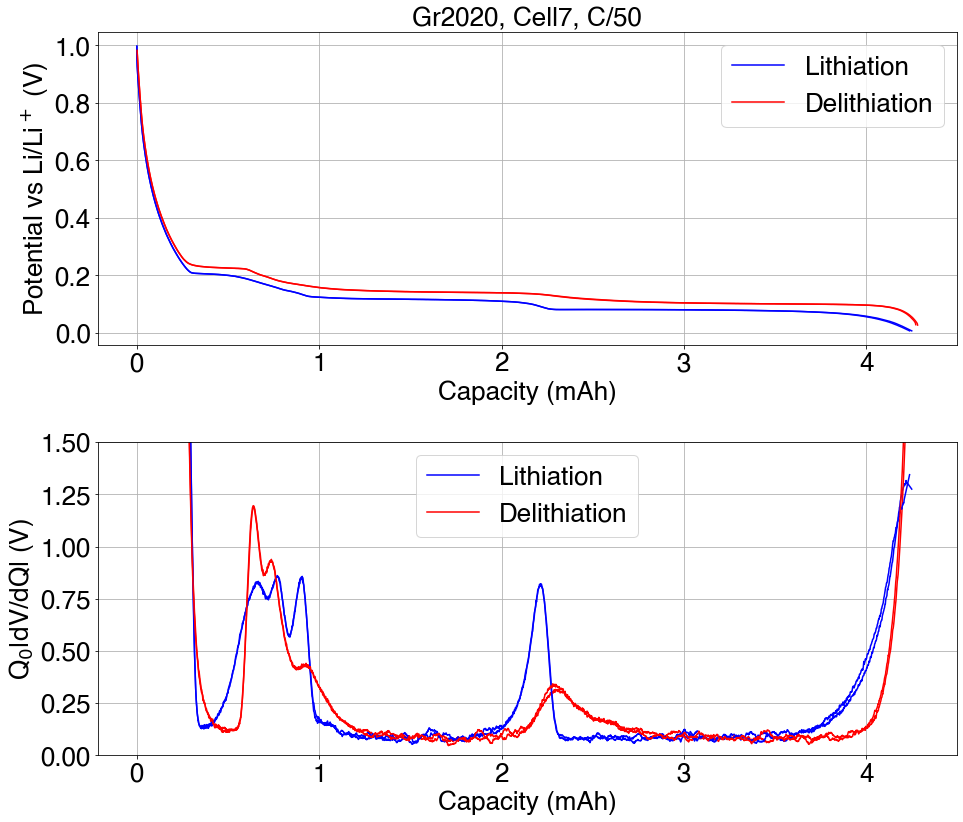

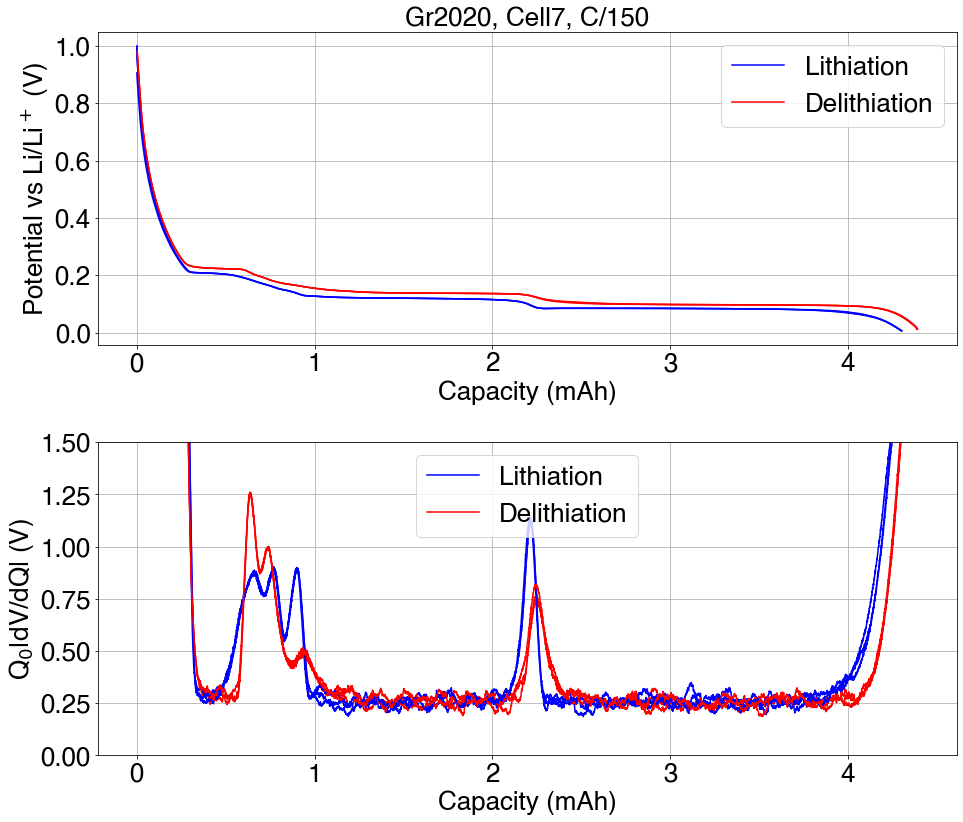

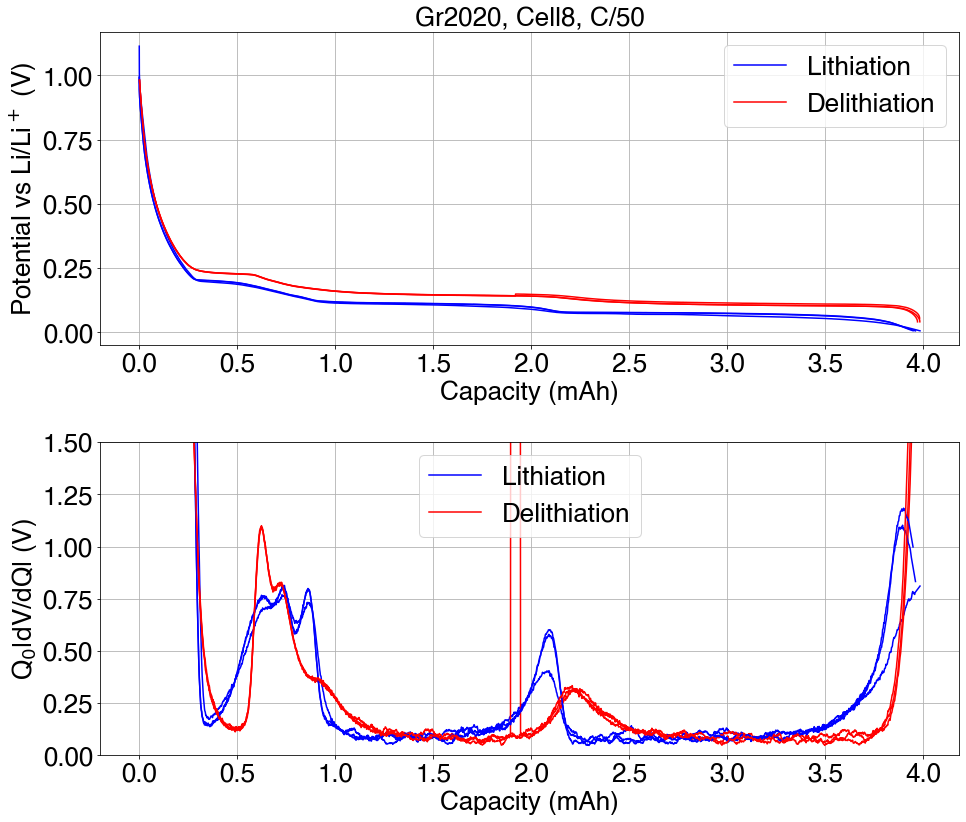

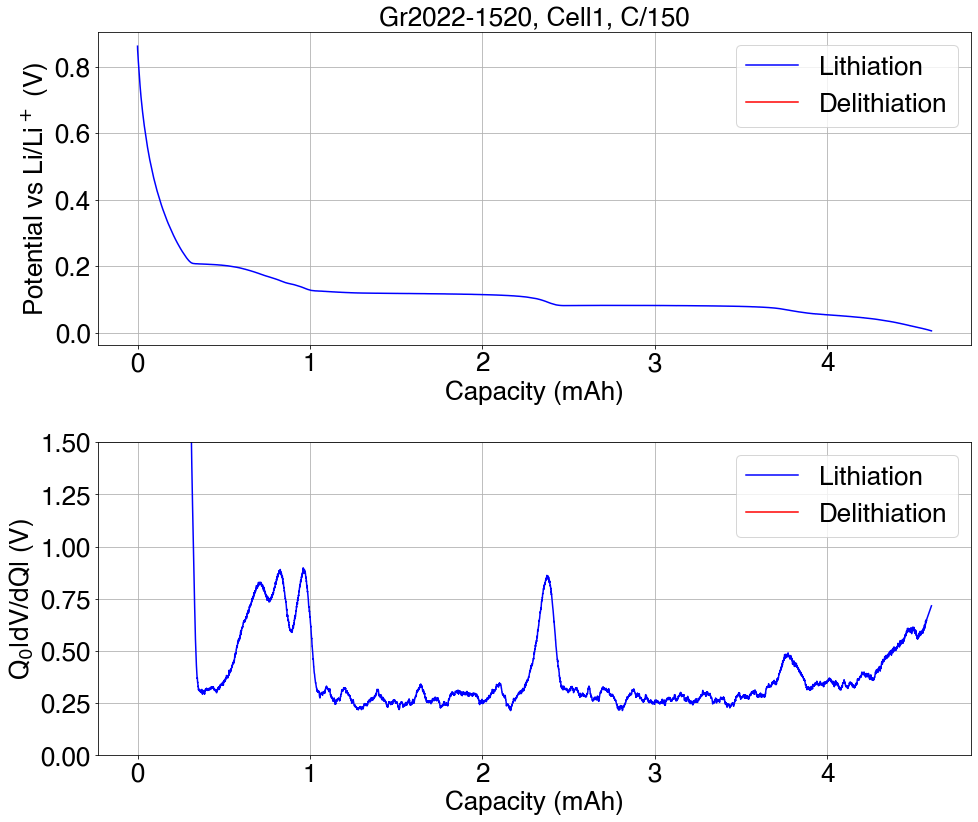

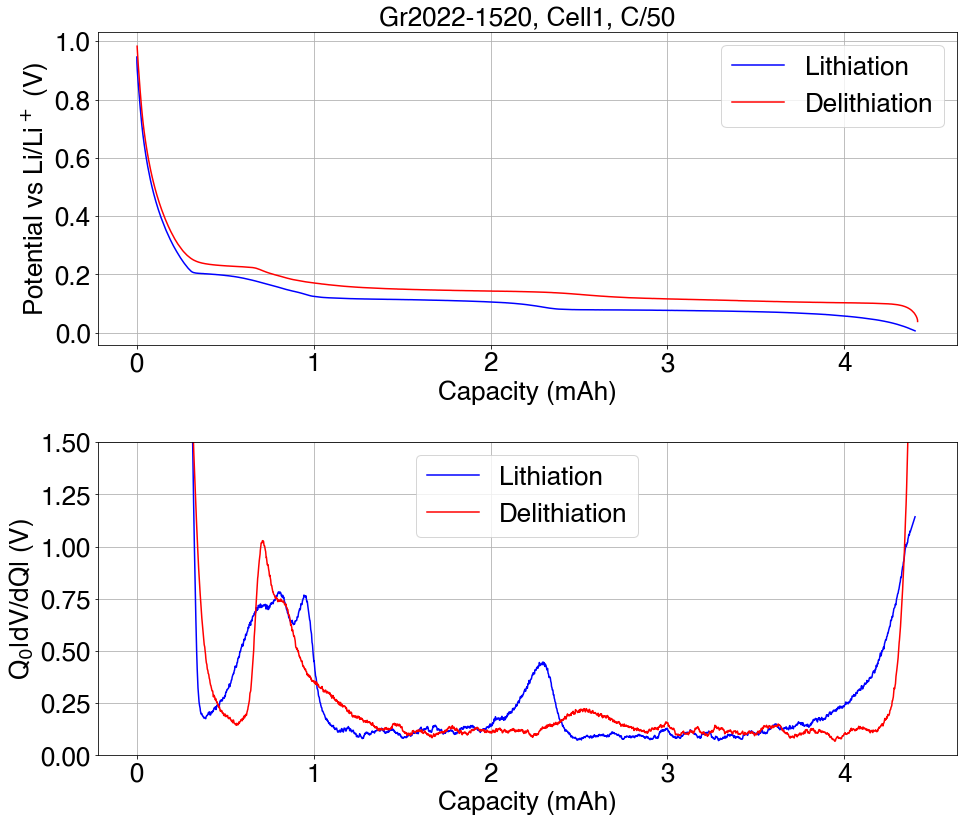

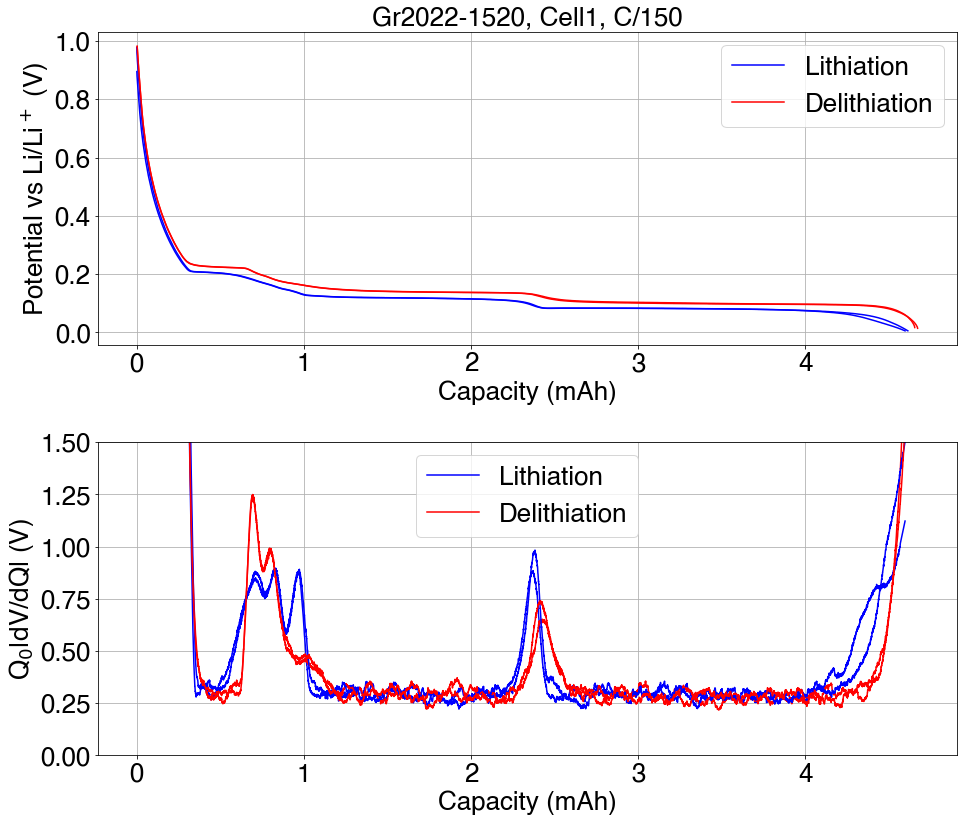

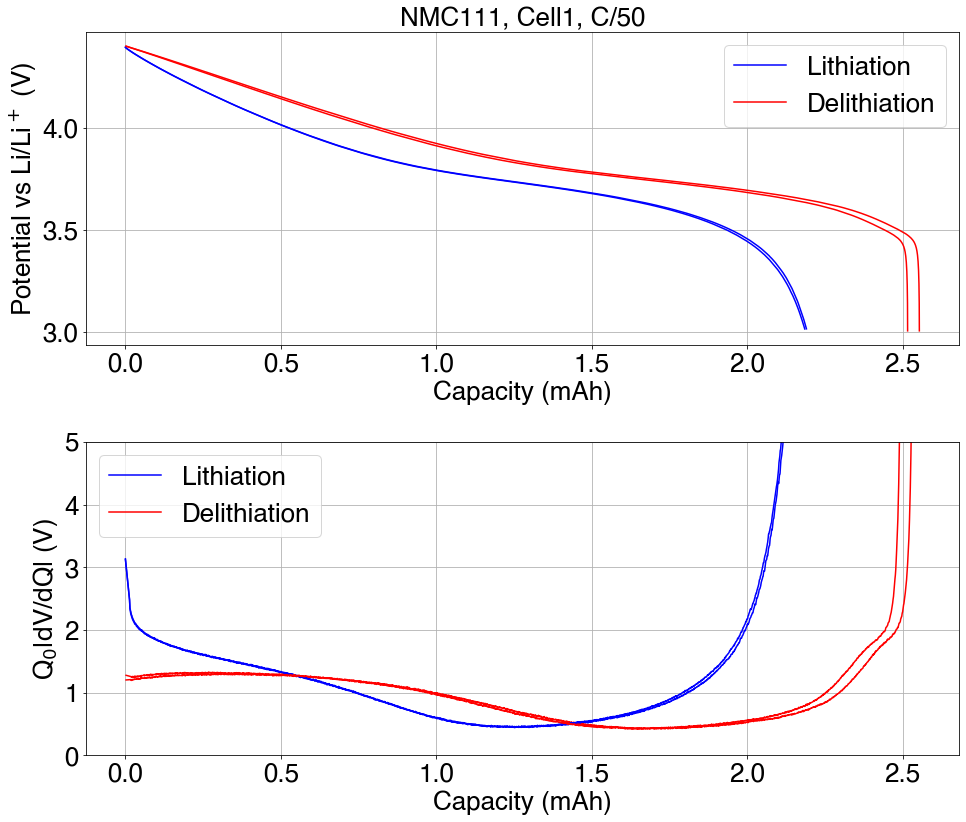

In [17]:
for file_path, df, label in zip(file_paths, df_list, neg_tags):

    fh = plt.figure()

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    print(f'Working on {file_path}')

    for cyc_num in df['cycle number'].unique():

        if cyc_num == 0 and 'NMC111' in label:
            continue 
        
        curr_df = df[df['cycle number'] == cyc_num]

        curr_red = curr_df[(curr_df['mode'] == 1) & (curr_df['ox/red'] == 0)]
        if not curr_red.empty:
            xr = curr_red['Capacity/mA.h'][:-5]
            yr = curr_red['Ecell/V'][:-5]

            # Detect and skip partial cycles
            if np.max(xr) < 3.0 and 'NMC111' not in label:
                continue 

            dr = np.abs(np.gradient(yr, xr)) * np.max(xr)
            ax1.plot(xr, yr, linestyle='-', color='b', label='_nolegend_')
            ax2.plot(xr, savgol_filter(dr, int(len(xr)/80), 1), 
            linestyle='-', color='b', label='_nolegend_')

        curr_ox = curr_df[(curr_df['mode'] == 1) & (curr_df['ox/red'] == 1)]

        if not curr_ox.empty:
            xo = np.max(curr_ox['Capacity/mA.h']) - curr_ox['Capacity/mA.h']
            xo = xo[:-5]
            yo = curr_ox['Ecell/V'][:-5]

            # Detect and skip partial cycles
            if np.max(xo) < 3.0 and 'NMC111' not in label:
                continue 
            
            do = np.abs(np.gradient(yo, xo)) * np.max(xo)

            ax1.plot(xo, yo, linestyle='-', color='r', label='_nolegend_')
            ax2.plot(xo, savgol_filter(do, int(len(xo)/80), 1), 
            linestyle='-', color='r', label='_nolegend_')

    ax1.plot(np.NaN, np.NaN, linestyle='-', color='b', label='Lithiation')
    ax1.plot(np.NaN, np.NaN, linestyle='-', color='r', label='Delithiation')
    ax1.legend()        
    ax1.set_title(label)
    ax1.set_xlabel('Capacity (mAh)')
    ax1.set_ylabel('Potential vs Li/Li$^+$ (V)')

    ax2.plot(np.NaN, np.NaN, linestyle='-', color='b', label='Lithiation')
    ax2.plot(np.NaN, np.NaN, linestyle='-', color='r', label='Delithiation')
    ax2.legend()   
    if 'NMC111' not in label:
        ax2.set_ylim((0, 1.5))
    else:
        ax2.set_ylim((0, 5))
    ax2.set_xlabel('Capacity (mAh)')
    ax2.set_ylabel('Q$_0$|dV/dQ| (V)')

# Half-cell data; filtered

In [18]:
file_path_picked

[PosixPath('data/2022-10-09-biologic-pc/UMBl2020/graphite/20210913_coin_graphite_cell7_c50_CA7.mpt'),
 PosixPath('data/2022-10-09-biologic-pc/UMBL2020/nmc111/20211203_coin_nmc111_cell1_c50_CA2.mpt')]

Working on data/2022-10-09-biologic-pc/UMBl2020/graphite/20210913_coin_graphite_cell7_c50_CA7.mpt
Working on data/2022-10-09-biologic-pc/UMBL2020/nmc111/20211203_coin_nmc111_cell1_c50_CA2.mpt


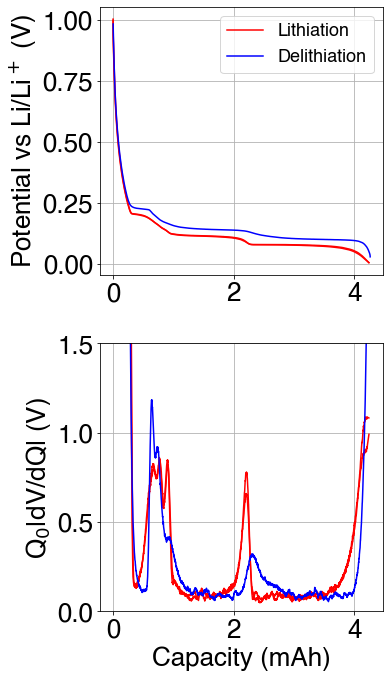

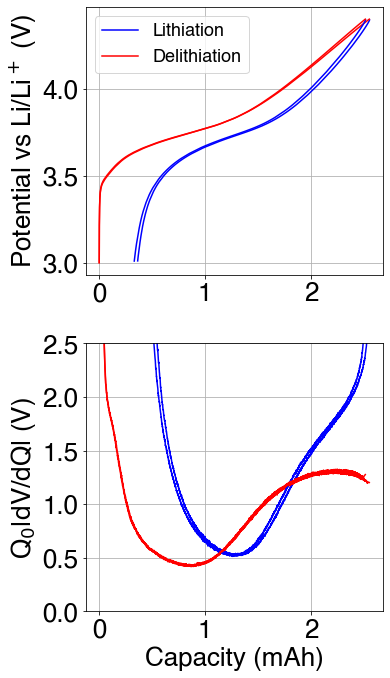

In [19]:
from re import I


for file_path, df, label in zip(file_path_picked, df_picked, label_picked):

    fh = plt.figure(figsize=(6, 10))

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    print(f'Working on {file_path}')

    for cyc_num in df['cycle number'].unique():

        if cyc_num == 0 and 'NMC' in label:
            continue 
        
        curr_df = df[df['cycle number'] == cyc_num]

        curr_red = curr_df[(curr_df['mode'] == 1) & (curr_df['ox/red'] == 0)]
        curr_ox = curr_df[(curr_df['mode'] == 1) & (curr_df['ox/red'] == 1)]

        col1 = 'b' if ('NMC' in label) else 'r'
        col2 = 'r' if ('NMC' in label) else 'b'

        if not curr_red.empty:

            if 'NMC' in label:
                xr = np.max(curr_ox['Capacity/mA.h']) - curr_red['Capacity/mA.h'] 
            else:
                xr = curr_red['Capacity/mA.h']

            xr = xr[:-5]
            yr = curr_red['Ecell/V'][:-5]


            # Detect and skip partial cycles
            if np.max(xr) < 3.0 and 'NMC111' not in label:
                continue 

            dr = np.abs(np.gradient(yr, xr)) * np.max(xr)
            ax1.plot(xr, yr, linestyle='-', color=col1, label='_nolegend_')
            ax2.plot(xr, savgol_filter(dr, int(len(xr)/80), 1), 
            linestyle='-', color=col1, label='_nolegend_')


        if not curr_ox.empty:
            if 'NMC' in label:
                xo = curr_ox['Capacity/mA.h']
            else:
                xo = np.max(curr_ox['Capacity/mA.h']) - curr_ox['Capacity/mA.h']
            xo = xo[:-5]
            yo = curr_ox['Ecell/V'][:-5]

            # Detect and skip partial cycles
            if np.max(xo) < 3.0 and 'NMC111' not in label:
                continue 
            
            do = np.abs(np.gradient(yo, xo)) * np.max(xo)

            ax1.plot(xo, yo, linestyle='-', color=col2, label='_nolegend_')
            ax2.plot(xo, savgol_filter(do, int(len(xo)/80), 1), 
            linestyle='-', color=col2, label='_nolegend_')

    ax1.plot(np.NaN, np.NaN, linestyle='-', color=col1, label='Lithiation')
    ax1.plot(np.NaN, np.NaN, linestyle='-', color=col2, label='Delithiation')
    ax1.legend(fontsize=18)   
    ax1.set_ylabel('Potential vs Li/Li$^+$ (V)')

    ax2.plot(np.NaN, np.NaN, linestyle='-', color=col1, label='Lithiation')
    ax2.plot(np.NaN, np.NaN, linestyle='-', color=col2, label='Delithiation')
    ylim = (0, 2.5) if ('NMC' in label) else (0, 1.5)
    ax2.set_ylim(ylim)
    ax2.set_xlabel('Capacity (mAh)')
    ax2.set_ylabel('Q$_0$|dV/dQ| (V)')

    plt.tight_layout()
    plt.savefig(f'{output_path}/fig_dvdq_details_half_cell_{label}.png', dpi=300)
